<h1 class='text-center'><strong>Introduction to data analysis using python</strong></h1>

### `Table of contents`

- > [**Project Jupyter**](#Project-Jupyter)
- > [**Introduction to Dataframes and Series**](#Introduction-to-Dataframes-and-Series)
- > [**Loading datasets**](#Loading-datasets)
- > [**Dataframes and Series attributes**](#Dataframes-and-Series-attributes)
    - identify columns in dataset
    - data types `-->` dtypes
    - describe
    - attributes `-->` shape, head, tail, sum, mean, max, min
    - unique, value_counts
    - data cleansing `-->` fillna
    - filtering (`isnull`, `notnull`, `==`, `!=`, `>=`, `<=`)
    - creating new columns
    - grouping data `-->` groupby
        - aggregate function `-->` agg
    - sorting values
    - map, apply
    - combining dataframes `-->` concat, merge, join
- > [**Charts `-->` `matplotlib`**](#Charts)
    - line `-->` pandas DatetimeIndex
    - bar
    - hist
    - scatter
- > [**Saving datasets**](#Saving-datasets)
    - e.g., csv, excel

---

## Project Jupyter

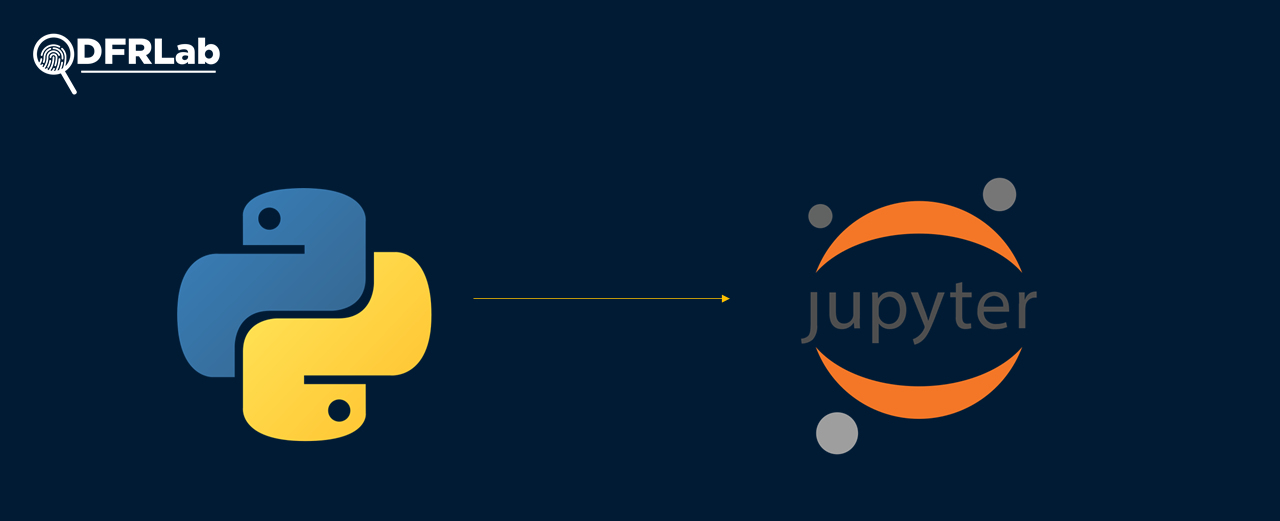

## Introduction to Dataframes and Series

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png)

Resources:

- https://pandas.pydata.org/docs/reference/index.html
- https://mybinder.org/v2/gh/DunderData/Tutorials/master by [@TedPetrou](https://twitter.com/TedPetrou)

In [ ]:
# import pandas library
import pandas as pd

![](https://i.pinimg.com/originals/33/71/e3/3371e377552eba39832f105b6c16e0fa.gif)

## `DataFrame`

A DataFrame is a table. Columns and rows.

Arrays by individual keys.

In [ ]:
# DataFrame
df = pd.DataFrame(
    {
        'column a': ['value 1', 'value 2'],
        'column b': [1, 2]
    }
)

In [ ]:
df

## `Series`

A sequence of data values.

Lists.

In [ ]:
# Serie
S = pd.Series([1, 2, 3, 4, 5])

In [ ]:
S

In [ ]:
S.name

A Series would be a column of a DataFrame. Based on this logic, you can assign new series to specific dataframes.

Tips:

- The length of the new Series should have the same length as the dataframe, or an individualized value.

In [ ]:
new_data = pd.Series(['january', 'april'])
new_data

In [ ]:
df['column c'] = new_data

In [ ]:
df

In [ ]:
df['column a']

In [ ]:
df['column d'] = 'DataFest Tbilisi'

In [ ]:
df

In [ ]:
df['column e'] = df['column a'] + ' ' + df['column c']

In [ ]:
df

## Loading datasets

![](https://66.media.tumblr.com/edf808a7dbbfe5854cce7bade966bc8d/tumblr_mqtmsi3Vy01ro8ysbo1_400.gifv)

Our datasets:

- indonesia_022020_tweets_csv_hashed.csv
- indonesia_022020_users_csv_hashed.csv


> Twitter is making publicly available archives of Tweets and media that we believe resulted from potentially state-backed information operations on our service.


Resources:

- https://transparency.twitter.com/en/information-operations.html

Tips:

- `pd.read_excel()`
- `pd.read_json()`
- `pd.read_sql()`
- `pd.read_html()`


Resources:

- https://towardsdatascience.com/learn-how-to-read-data-into-a-pandas-dataframe-in-5-minutes-122af8e0b9db

In [ ]:
tweet_path = '/kaggle/input/datafest-tbilisi-demo/indonesia_022020_tweets_csv_hashed.csv'
tweet_data = pd.read_csv(tweet_path, encoding='utf-8', low_memory=False)

In [ ]:
# find parameters available
# pd.read_csv()

In [ ]:
?pd.read_csv

In [ ]:
users_path = '/kaggle/input/datafest-tbilisi-demo/indonesia_022020_users_csv_hashed.csv'
users_data = pd.read_csv(users_path, encoding='utf-8')

In [ ]:
type(users_data)

In [ ]:
tweet_data.columns

In [ ]:
users_data.columns

In [ ]:
tweet_data.dtypes

In [ ]:
users_data.dtypes

In [ ]:
tweet_data.describe()

In [ ]:
users_data.describe()

## Dataframes and Series attributes

![](https://media1.tenor.com/images/5f039cf823c147ec0ecebc31b661401b/tenor.gif?itemid=14917662)

`The first main attributes to use after loading a dataset`

*shape*

In [ ]:
tweet_data.shape

In [ ]:
users_data.shape

*head and tail*

Let's take a quick look at what the data looks like

In [ ]:
tweet_data.head()

In [ ]:
users_data.tail()

**built-ins.**

*sum, mean, max, min*

- Operators such as `>=`, `<=` for numeric data


Resources:

- https://python-reference.readthedocs.io/en/latest/docs/operators/

In [ ]:
users_data['follower_count'].sum()

In [ ]:
users_data.shape

In [ ]:
users_data['follower_count'].sum() / users_data.shape[0]

In [ ]:
users_data['follower_count'].mean()

In [ ]:
users_data['follower_count'].max()

*Can we apply these operators to strings types?*

![](https://media0.giphy.com/media/3o7qiZd2ORhXiqoEDe/source.gif)

In [ ]:
users_data['account_creation_date']

In [ ]:
users_data['account_creation_date'].iloc[0]

In [ ]:
type(users_data['account_creation_date'].iloc[0])

In [ ]:
users_data['account_creation_date'].max()

### *So, let's start to answer some question while we are learning some more attributes*

![](https://media2.giphy.com/media/5mdjd9dXsZA9a/giphy.gif)

### How many users do we have?

**unique**

In [ ]:
tweet_data['userid'].unique().shape

Ok! So, Twitter remove 795 accounts. Our dataset - from Jan 2019 to Dec 2019 - only contains 519 accounts out of 795.

## Which was the most active account?

**value_counts**

In [ ]:
tweet_data['userid'].value_counts()

## Which was the most active account - based on retweets?

**operators and value_counts**

In [ ]:
tweet_data['is_retweet'].unique()

In [ ]:
tweet_data[tweet_data['is_retweet'] == True].shape

The number of retweets is quite small compared to other information operations in which retweets are the main component to amplify content.

Since this line of code `tweet_data[tweet_data['is_retweet'] == True]` returns a subdataset, we can access now to specific columns

In [ ]:
tweet_data[tweet_data['is_retweet'] == True]['userid'].value_counts().head()

## Retweet proportion

In [ ]:
tweet_data['is_retweet'].value_counts()

In [ ]:
proportion = round((tweet_data['is_retweet'].value_counts()[True] / tweet_data.shape[0]) * 100, 2)
f'{proportion}%'

## Most used source `-->` Software used to publish the tweet

In [ ]:
tweet_data['tweet_client_name'].value_counts().head(10)

## Most popular tweets.

### 4 indicators

- retweet_count
- like_count
- quote_count
- reply_count


Resources:

- [Network of pro-Maduro Twitter accounts pushed anti-Guaidó hashtags](https://medium.com/dfrlab/network-of-pro-maduro-twitter-accounts-pushed-anti-guaid%C3%B3-hashtags-530f034f3628)

**fillna**

In [ ]:
tweet_data[tweet_data['retweet_count'].isnull()].shape

In [ ]:
tweet_data[tweet_data['retweet_count'].isnull()].head()

In [ ]:
tweet_data[tweet_data['like_count'].isnull()].shape

In [ ]:
tweet_data[tweet_data['quote_count'].isnull()].shape

In [ ]:
tweet_data[tweet_data['reply_count'].isnull()].shape

In [ ]:
tweet_data['retweet_count'] = tweet_data['retweet_count'].fillna(0)
tweet_data['like_count'] = tweet_data['like_count'].fillna(0)
tweet_data['quote_count'] = tweet_data['quote_count'].fillna(0)
tweet_data['reply_count'] = tweet_data['reply_count'].fillna(0)

## Testing...

![](https://media.giphy.com/media/xThtapzvqTGViWhwuA/giphy.gif)

In [ ]:
tweet_data[tweet_data['retweet_count'].isnull()]

- **astype**
- creating new columns

In [ ]:
tweet_data['popularity'] = tweet_data['retweet_count'] + tweet_data['like_count'] + tweet_data['quote_count'] + tweet_data['reply_count']
tweet_data['popularity'] = tweet_data['popularity'].astype(int)

**value counts** `----->` nah!

#### Let's use a different function!

- groupby
    - aggregate function
- sort_values

In [ ]:
popular_tweets = tweet_data.groupby('tweetid').agg(
    {
        'popularity': sum
    }
).sort_values(by='popularity', ascending=False)

# result
popular_tweets.head()

## Most engaged-with hashtag

- map, apply

These two functions `map()` and `apply()` are quite similar. Both take a function to **transform** data values. In other terms, both return new `Series`, where values are based on a specific function.

If we explore the column `hashtags`, we notice that it is a string that contains a list `---->` `[]`

In [ ]:
tweet_data['hashtags'].head()

In [ ]:
tweet_data['hashtags'].iloc[2]

In [ ]:
type(tweet_data['hashtags'].iloc[2])

In [ ]:
tweet_data['hashtags'].iloc[2][0]

Tips:
- We can use `ast` module

In [ ]:
import ast

We can create a new column `hashtags_list`. We could overwrite the same column, but let's create a new one to compare both cases.

For this purpose, we are going to use a function called `lambda`.

- `lambda` function is a single-line function declared with no name. This is an anonymous function.


Resources:

- https://www.geeksforgeeks.org/python-lambda-anonymous-functions-filter-map-reduce/

![](https://media1.tenor.com/images/5ee291f9cf166e58250ec6942ded7cab/tenor.gif?itemid=4360958)

In [ ]:
tweet_data['hashtags_list'] = tweet_data['hashtags'].apply(lambda arg: ast.literal_eval(arg))

In [ ]:
tweet_data['hashtags_list'].head()

In [ ]:
tweet_data['hashtags_list'].iloc[2]

In [ ]:
tweet_data['hashtags_list'].iloc[2][0]

**List comprehesions**

A concise way to create lists. They aim to create a new list based on iterations.

Resources:

- https://medium.com/better-programming/list-comprehension-in-python-8895a785550b

In [ ]:
hashtags = [h for item in tweet_data['hashtags_list'] for h in item]

In [ ]:
print (f'Number of hashtags --> {len(hashtags)}')

We have more than 1M hashtags in total.


Tips:
- We can use a new library to `Counter` all these hashtags

In [ ]:
from collections import Counter

`Counter` will return a list of tuples, in this case `[(hashtag, N)]`. 

In [ ]:
Counter(hashtags).most_common()[:10]

Right now, we have only explored the tweets dataset, but...

## What are the most common reported locations by the accounts?

- We can use `value_counts` here

In [ ]:
users_data['user_reported_location'].value_counts().head()

Let's do the same, but only with the top ten most active accounts, posting either original posts or retweets.


Tips:
- get the top ten most active accounts
- select the top ten most active accounts in users data (using `isin` method)
- get reported location by those accounts

In [ ]:
tweet_data['counter'] = 1

In [ ]:
most_active_accounts = tweet_data.groupby('userid').agg({'counter': sum}) \
    .sort_values(by='counter', ascending=False) \
    .reset_index() \
    ['userid'].loc[:9]

In [ ]:
len(most_active_accounts)

In [ ]:
most_active_accounts_data = users_data[users_data['userid'].isin(most_active_accounts)]
most_active_accounts_data.shape

In [ ]:
most_active_accounts_data['user_reported_location'].value_counts()

`value_counts` is an easy way to counter data in `Series` and explore those results.

If we would like to merge **users data** with **tweets data**, we could use the `merge` function.

Tips:

- Merge would be based on the `userid` column.


Resources:

- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [ ]:
combined_data = tweet_data.merge(users_data, how='left', on='userid')
combined_data.shape

In [ ]:
combined_data.iloc[0]

## Charts

![](https://media0.giphy.com/media/d31vTpVi1LAcDvdm/source.gif)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
gpo_tweets_by_date = combined_data.groupby('tweet_time').agg({'counter': 'sum'})

In [ ]:
gpo_tweets_by_date.index = pd.DatetimeIndex(gpo_tweets_by_date.index)

In [ ]:
gpo_tweets_by_date.plot()

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
gpo_tweets_by_date.plot(kind='line', linewidth=1, ax=ax)

# ticks format
ax.set_ylabel('Number of tweets', labelpad=35, fontsize=18, color='#878dac')
ax.set_xlabel('Tweet time', labelpad=35, fontsize=18, color='#878dac')
plt.box(False);

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
combined_data.plot(x='retweet_count', y='reply_count', kind='scatter', linewidth=1, ax=ax)

# ticks format
ax.set_ylabel('Reply count', labelpad=35, fontsize=18, color='#878dac')
ax.set_xlabel('Retweet count', labelpad=35, fontsize=18, color='#878dac');

In [ ]:
hashtags_freqs = Counter(hashtags).most_common()
hashtags_data = pd.DataFrame(hashtags_freqs, columns=['hashtag', 'frequency'])
hashtags_data.head()

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
hashtags_data.head(10).iloc[::-1].plot(x='hashtag', y='frequency', kind='barh', ax=ax, legend=False)

# ticks format
ax.tick_params(direction='out', color='#070733', labelsize=15, labelrotation=0, pad=15, labelcolor='#878dac')
ax.set_ylabel('Frequency', labelpad=35, fontsize=18, color='#878dac')
ax.set_xlabel('Retweet count', labelpad=35, fontsize=18, color='#878dac')
plt.box(False);

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
tweet_data['tweet_client_name'].value_counts().head(10).iloc[::-1] \
    .plot(kind='barh', ax=ax, legend=False)

# ticks format
ax.tick_params(direction='out', color='#070733', labelsize=15, labelrotation=0, pad=15, labelcolor='#878dac')
ax.set_ylabel('Frequency', labelpad=35, fontsize=18, color='#878dac')
ax.set_xlabel('Source', labelpad=35, fontsize=18, color='#878dac')
plt.box(False);

Number of posts by accunts created 

In [ ]:
account_creation_date = combined_data.groupby('account_creation_date').agg({'counter': sum})

In [ ]:
account_creation_date.index = pd.DatetimeIndex(account_creation_date.index)

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
account_creation_date.plot(kind='line', linewidth=1, ax=ax)

# ticks format
ax.set_ylabel('Number of tweets', labelpad=35, fontsize=18, color='#878dac')
ax.set_xlabel("accounts' creation date time", labelpad=35, fontsize=18, color='#878dac')
plt.box(False);

## Saving a dataset

![](https://img.allfootballapp.com/www/M00/3F/9E/rB8CLF0AJE6AEyFuACLGqOWn0DA710.gif)

Let's create a new subdataset, filtering by dates.

- Tweets posted only in September 2019.
- by accounts created in the same month

In [ ]:
subdataset = combined_data[
    (combined_data['tweet_time'] >= '2019-09-01') &
    (combined_data['tweet_time'] <= '2019-09-30') &
    (combined_data['account_creation_date'] >= '2019-09-01')
]

# sample
subdataset.shape

In [ ]:
save_path = '/kaggle/working/outputfile.csv'
subdataset.to_csv(save_path, encoding='utf-8', index=False)